In [2]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting and visualization
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from imblearn.over_sampling import RandomOverSampler  # Importing RandomOverSampler for handling imbalanced datasets

### Dataset:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]  # Defines the column names for the dataset
df = pd.read_csv("magic04.data", names = cols)  # Reads the dataset from a CSV file and assigns the column names
df.head()  # Displays the first few rows of the dataframe to check the data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df['class'] = (df['class'] == 'g').astype(int)  # Converts the 'class' column to binary, where 'g' is 1 and anything else is 0

In [8]:
df.head()  # Displays the first few rows of the dataframe to verify the 'class' column conversion

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


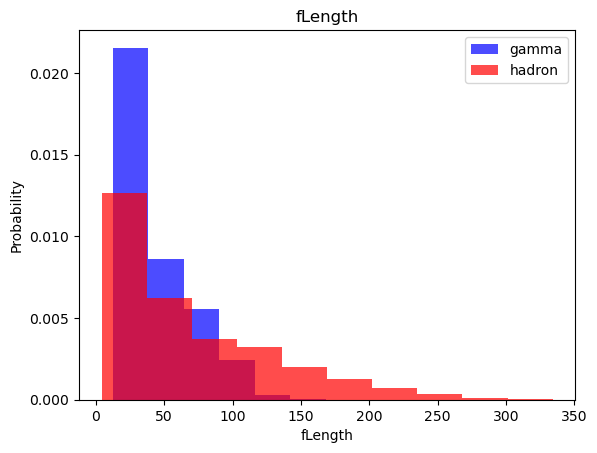

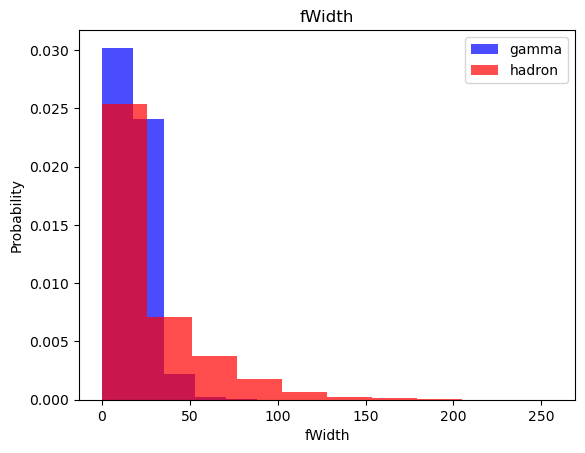

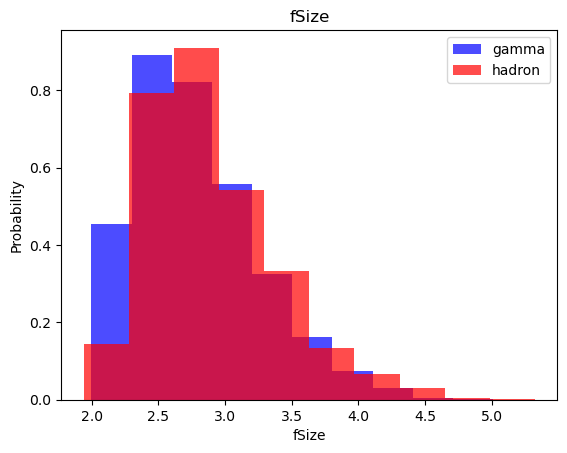

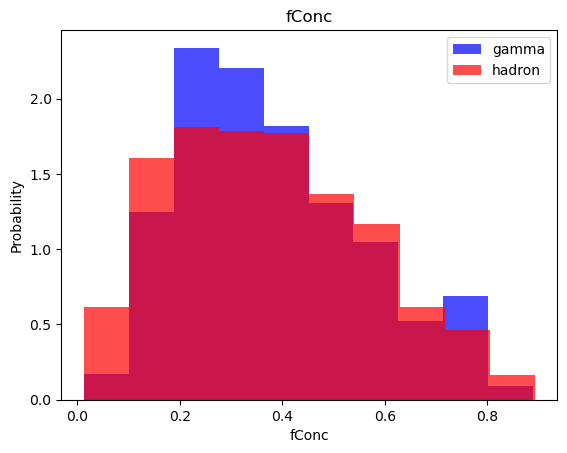

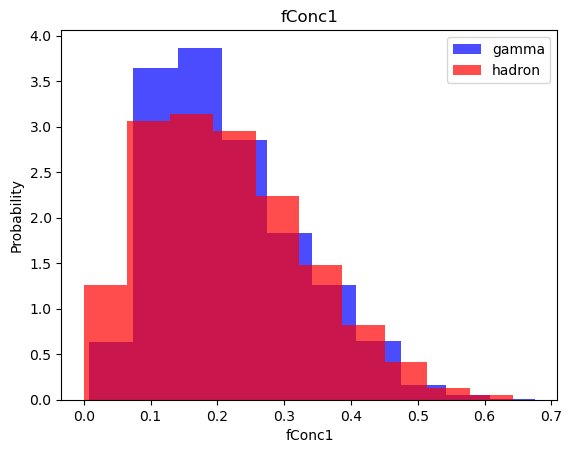

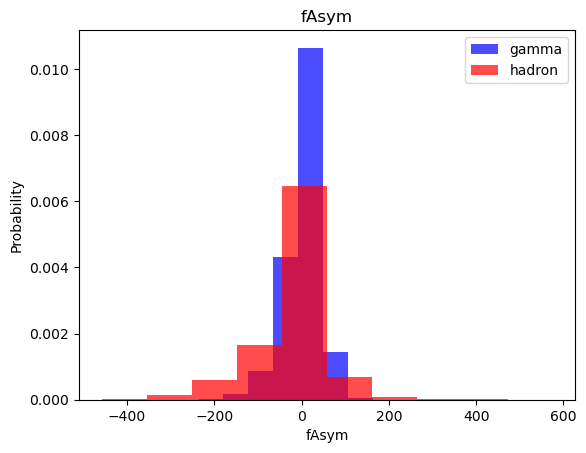

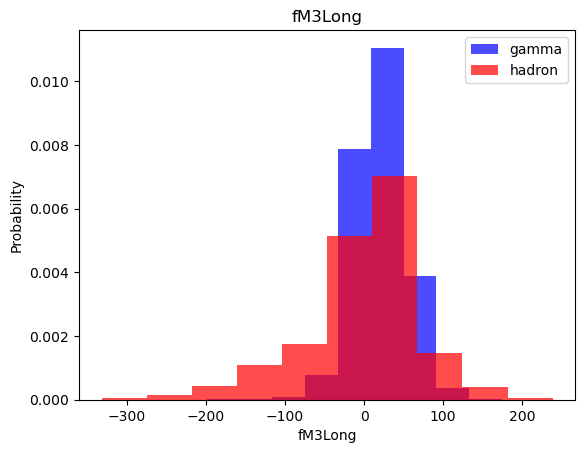

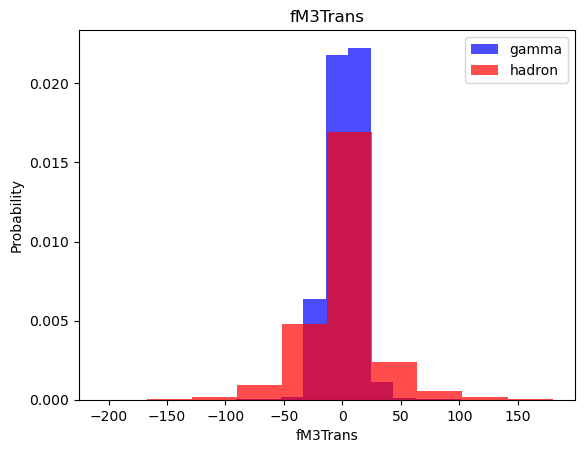

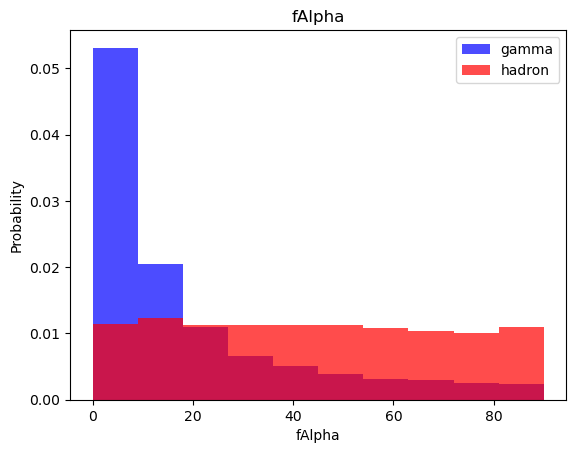

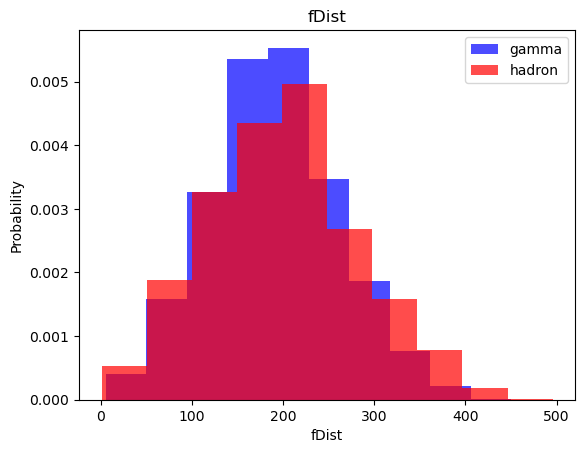

In [10]:
for label in cols[:-1]:  # Iterates through all columns except the 'class' column
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)  # Plots histogram for 'gamma' class (class == 1) in blue
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)  # Plots histogram for 'hadron' class (class == 0) in red
    plt.title(label)  # Sets the title of the plot to the current column name
    plt.ylabel('Probability')  # Labels the y-axis as 'Probability'
    plt.xlabel(label)  # Labels the x-axis with the current column name
    plt.legend()  # Adds a legend to differentiate between 'gamma' and 'hadron'
    plt.show()  # Displays the plot

# Train, validation, test datasets

In [12]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  # Randomly splits the dataframe into training (60%), validation (20%), and test (20%) sets

D:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values  # Extracts feature values from the dataframe
    y = dataframe[dataframe.columns[-1]].values  # Extracts target values from the dataframe

    scaler = StandardScaler()  # Initializes the StandardScaler for feature scaling
    X = scaler.fit_transform(X)  # Scales the feature values

    if oversample:  # Checks if oversampling is needed
        ros = RandomOverSampler()  # Initializes the RandomOverSampler
        X, y = ros.fit_resample(X, y)  # Applies oversampling to balance the classes

    data = np.hstack((X, np.reshape(y, (-1, 1))))  # Combines the features and target values into one dataset

    return data, X, y  # Returns the complete dataset, features, and target values

In [16]:
train, X_train, y_train = scale_dataset(train, oversample=True)  # Scales and oversamples the training data
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)  # Scales the validation data without oversampling
test, X_test, y_test = scale_dataset(test, oversample=False)  # Scales the test data without oversampling

# kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier  # Imports the K-Nearest Neighbors classifier
from sklearn.metrics import classification_report  # Imports the classification report for evaluating the model

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initializes the K-Nearest Neighbors classifier with 5 neighbors
knn_model.fit(X_train, y_train)  # Fits the KNN model to the training data

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(X_test)  # Uses the trained KNN model to predict the target values for the test data

In [24]:
print(classification_report(y_test, y_pred))  # Prints a classification report showing precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1332
           1       0.85      0.86      0.86      2472

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB  # Imports the Gaussian Naive Bayes classifier

In [28]:
nb_model = GaussianNB()  # Initializes the Gaussian Naive Bayes classifier
nb_model = nb_model.fit(X_train, y_train)  # Fits the Naive Bayes model to the training data

In [30]:
y_pred = nb_model.predict(X_test)  # Uses the trained Naive Bayes model to predict the target values for the test data
print(classification_report(y_test, y_pred))  # Prints a classification report showing precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       0.71      0.43      0.53      1332
           1       0.75      0.91      0.82      2472

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



# Log Regression

In [32]:
from sklearn.linear_model import LogisticRegression  # Imports the Logistic Regression classifier

In [34]:
lg_model = LogisticRegression()  # Initializes the Logistic Regression classifier
lg_model = lg_model.fit(X_train, y_train)  # Fits the Logistic Regression model to the training data

In [36]:
y_pred = lg_model.predict(X_test)  # Uses the trained Logistic Regression model to predict the target values for the test data
print(classification_report(y_test, y_pred))  # Prints a classification report showing precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1332
           1       0.85      0.82      0.83      2472

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



# SVM

In [38]:
from sklearn.svm import SVC  # Imports the Support Vector Classifier (SVC) for classification tasks

In [40]:
svm_model = SVC()  # Initializes the Support Vector Classifier (SVC) with default parameters
svm_model = svm_model.fit(X_train, y_train)  # Fits the SVC model to the training data

In [42]:
y_pred = svm_model.predict(X_test)  # Uses the trained Support Vector Classifier (SVC) model to predict the target values for the test data
print(classification_report(y_test, y_pred))  # Prints a classification report showing precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1332
           1       0.89      0.89      0.89      2472

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Net

In [44]:
import tensorflow as tf  # Imports TensorFlow, a library for building and training neural networks and other machine learning models

In [46]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # Creates a figure with two subplots side by side
  ax1.plot(history.history['loss'], label='loss')  # Plots the training loss over epochs on the first subplot
  ax1.plot(history.history['val_loss'], label='val_loss')  # Plots the validation loss over epochs on the first subplot
  ax1.set_xlabel('Epoch')  # Labels the x-axis of the first subplot
  ax1.set_ylabel('Binary crossentropy')  # Labels the y-axis of the first subplot
  ax1.grid(True)  # Adds a grid to the first subplot

  ax2.plot(history.history['accuracy'], label='accuracy')  # Plots the training accuracy over epochs on the second subplot
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')  # Plots the validation accuracy over epochs on the second subplot
  ax2.set_xlabel('Epoch')  # Labels the x-axis of the second subplot
  ax2.set_ylabel('Accuracy')  # Labels the y-axis of the second subplot
  ax2.grid(True)  # Adds a grid to the second subplot

  plt.show()  # Displays the plots

In [48]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([  # Initializes a sequential model
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),  # First dense layer with ReLU activation
      tf.keras.layers.Dropout(dropout_prob),  # Dropout layer to prevent overfitting
      tf.keras.layers.Dense(num_nodes, activation='relu'),  # Second dense layer with ReLU activation
      tf.keras.layers.Dropout(dropout_prob),  # Dropout layer to prevent overfitting
      tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',  # Compiles the model with Adam optimizer and binary crossentropy loss
                  metrics=['accuracy'])  # Tracks accuracy as an additional metric
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0  # Trains the model with the provided parameters, using 20% of the data for validation
  )

  return nn_model, history  # Returns the trained model and the training history

16 nodes, dropout 0, lr 0.01, batch size 32


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


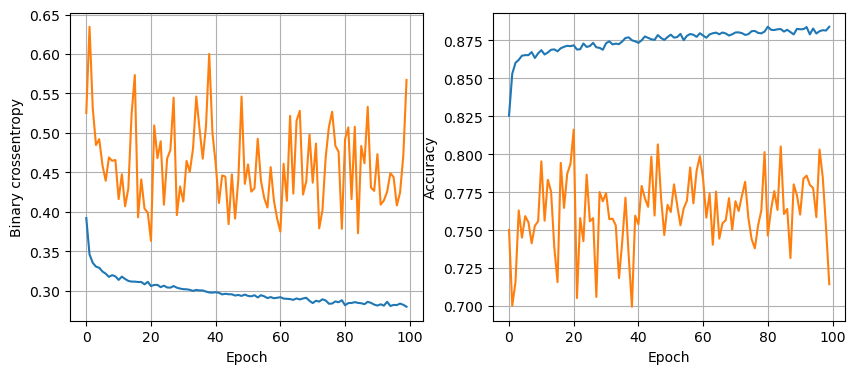

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3517
16 nodes, dropout 0, lr 0.01, batch size 64


KeyboardInterrupt: 

In [52]:
least_val_loss = float('inf')  # Initializes the least validation loss to infinity
least_loss_model = None  # Placeholder for the model with the least validation loss
epochs = 100  # Sets the number of epochs for training

for num_nodes in [16, 32, 64]:  # Iterates over different numbers of nodes in the hidden layers
  for dropout_prob in [0, 0.2]:  # Iterates over different dropout probabilities
    for lr in [0.01, 0.005, 0.001]:  # Iterates over different learning rates
      for batch_size in [32, 64, 128]:  # Iterates over different batch sizes
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")  # Prints current hyperparameters being tested
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)  # Trains the model with current hyperparameters
        plot_history(history)  # Plots the training and validation loss and accuracy history
        val_loss = model.evaluate(X_valid, y_valid)[0]  # Evaluates the model on the validation set and gets the validation loss
        if val_loss < least_val_loss:  # Checks if the current model has a lower validation loss than previously seen
          least_val_loss = val_loss  # Updates the least validation loss
          least_loss_model = model  # Saves the model with the least validation loss


In [54]:
y_pred = least_loss_model.predict(X_test)  # Uses the best model to predict the probabilities for the test set
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)  # Converts the probabilities to binary predictions (0 or 1) and reshapes the array

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
print(classification_report(y_test, y_pred))  # Prints a classification report showing precision, recall, F1-score, and support for each class based on the test set predictions

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1332
           1       0.86      0.96      0.91      2472

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.88      0.87      0.87      3804

